## Librerías

In [39]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import sklearn.metrics
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.neighbors import NearestNeighbors
from  matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [50]:
warnings.filterwarnings('ignore')

## Inicialización del Dataset

El conjunto de datos utilizado es el Iris Flower Dataset, cuenta con 20 características y 1200 datos. Se puede encontrar una descripción más amplia del mismo, así como descargarlo en: https://www.kaggle.com/datasets/arshid/iris-flower-dataset/data

In [20]:
#df = pd.read_csv('/content/drive/MyDrive/I - II Ciclo - 2024/IF7103 - Sistemas Expertos/Proyecto/iris_extended.csv')
df = pd.read_csv('data/iris_extended.csv')
df.head()

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641


### Inicialización de X (datos) - y (etiquetas)

Se tienen como etiquetas el tipo de especie de las flores de lirio (Versicolor, Virginica y Setosa)

In [21]:
target = ['species']

X = X=df.drop('species', axis=1)
y = df[target]

true_labels = y.species.map({'versicolor': 0, 'virginica': 1, 'setosa': 2})

## Análisis y visualización del dataset

En primer lugar, el dataset cuenta con un característica en texto, la cual es el tipo de suelo. Por lo que, para tomarlo en cuenta para evaluación de los algoritmos de clustering, se les aginaron datos números que representen a cada uno de ellos. El código a continuación hace dicha conversión.

In [22]:
unique_values = X['soil_type'].unique()

# Se define el diccionario de mapeo para cada tipo de suelo (Loamy, Sandy, Clayey)
soil_type_map = {'sandy': 2, 'clay': 1, 'loamy': 0}

# Se verifica que todos los valores están en el diccionario de mapeo
if set(unique_values).issubset(set(soil_type_map.keys())):
    X.loc[:, 'soil_type'] = X['soil_type'].map(soil_type_map)
    print("Conversión exitosa.")
else:
    print("Error: Algunos valores en 'soil_type' no están en el diccionario de mapeo.")

# Se muestran los valores únicos en la columna 'soil_type' después del mapeo
print("Valores únicos en 'soil_type' después del mapeo:", X['soil_type'].unique())

Conversión exitosa.
Valores únicos en 'soil_type' después del mapeo: [2 1 0]


### Visualización de los datos en gráficos

El método "mostrar_graficos", permite visualizar las 20 características del Iris Dataset Extended, en gráficos de dos dimensiones, emparejando las características en dos. Se utilizó como base la sección de analisis explorativo del siguiente ejemplo de código: https://www.kaggle.com/code/matteoanzano111/visualizing-high-dimensional-data-pca-and-t-sne

In [23]:
def mostrar_graficos(df, target):
    figure, axes = plt.subplots(5, 2, figsize=(10, 25))
    # For Sine Function

    p1=Line2D([], [], color=sns.color_palette("deep")[0], marker='.', ls='', label='setosa',markersize=10)
    p2=Line2D([], [], color=sns.color_palette("deep")[1], marker='.', ls='', label='versicolor',markersize=10)
    p3=Line2D([], [], color=sns.color_palette("deep")[2], marker='.', ls='', label='virginica',markersize=10)

    # 'elevation x soil_type',
    sns.scatterplot(ax=axes[0, 0], data=df, hue=target, y='soil_type', x='elevation', legend=False)

    # 'sepal_length x sepal_width'
    sns.scatterplot(ax=axes[0, 1], data=df, hue=target, y='petal_length', x='petal_width', legend=False)

    # 'petal_length x petal_width'
    sns.scatterplot(ax=axes[1, 0], data=df, hue=target, y='sepal_length', x='sepal_width', legend=False)

    # 'sepal_area x petal_area'
    sns.scatterplot(ax=axes[1, 1], data=df, hue=target, y='sepal_area', x='petal_area', legend=False)

    # 'sepal_aspect_ratio x petal_aspect_ratio'
    sns.scatterplot(ax=axes[2, 0], data=df, hue=target, y='sepal_aspect_ratio', x='petal_aspect_ratio', legend=False)

    # 'sepal_to_petal_length_ratio x sepal_to_petal_width_ratio'
    sns.scatterplot(ax=axes[2, 1], data=df, hue=target, y='sepal_to_petal_length_ratio', x='sepal_to_petal_width_ratio', legend=False)

    # ''sepal_petal_length_diff x sepal_petal_width_diff','
    sns.scatterplot(ax=axes[3, 0], data=df, hue=target, y='sepal_petal_length_diff', x='sepal_petal_width_diff', legend=False)

    # 'sepal_to_petal_length_ratio x sepal_to_petal_width_ratio'
    sns.scatterplot(ax=axes[3, 1], data=df, hue=target, y='petal_curvature_mm', x='petal_texture_trichomes_per_mm2', legend=False)

    # 'leaf_area_cm2 x sepal_area_sqrt'
    sns.scatterplot(ax=axes[4, 0], data=df, hue=target, y='leaf_area_cm2', x='sepal_area_sqrt', legend=False)

    #'petal_area_sqrt x area_ratios'
    sns.scatterplot(ax=axes[4, 1], data=df, hue=target, y='petal_area_sqrt', x='area_ratios', legend=False)

    plt.figlegend(handles=[p1,p2,p3], loc="right", fontsize=10,bbox_to_anchor=(1.05, 0.5, 0, 0))
    plt.show()

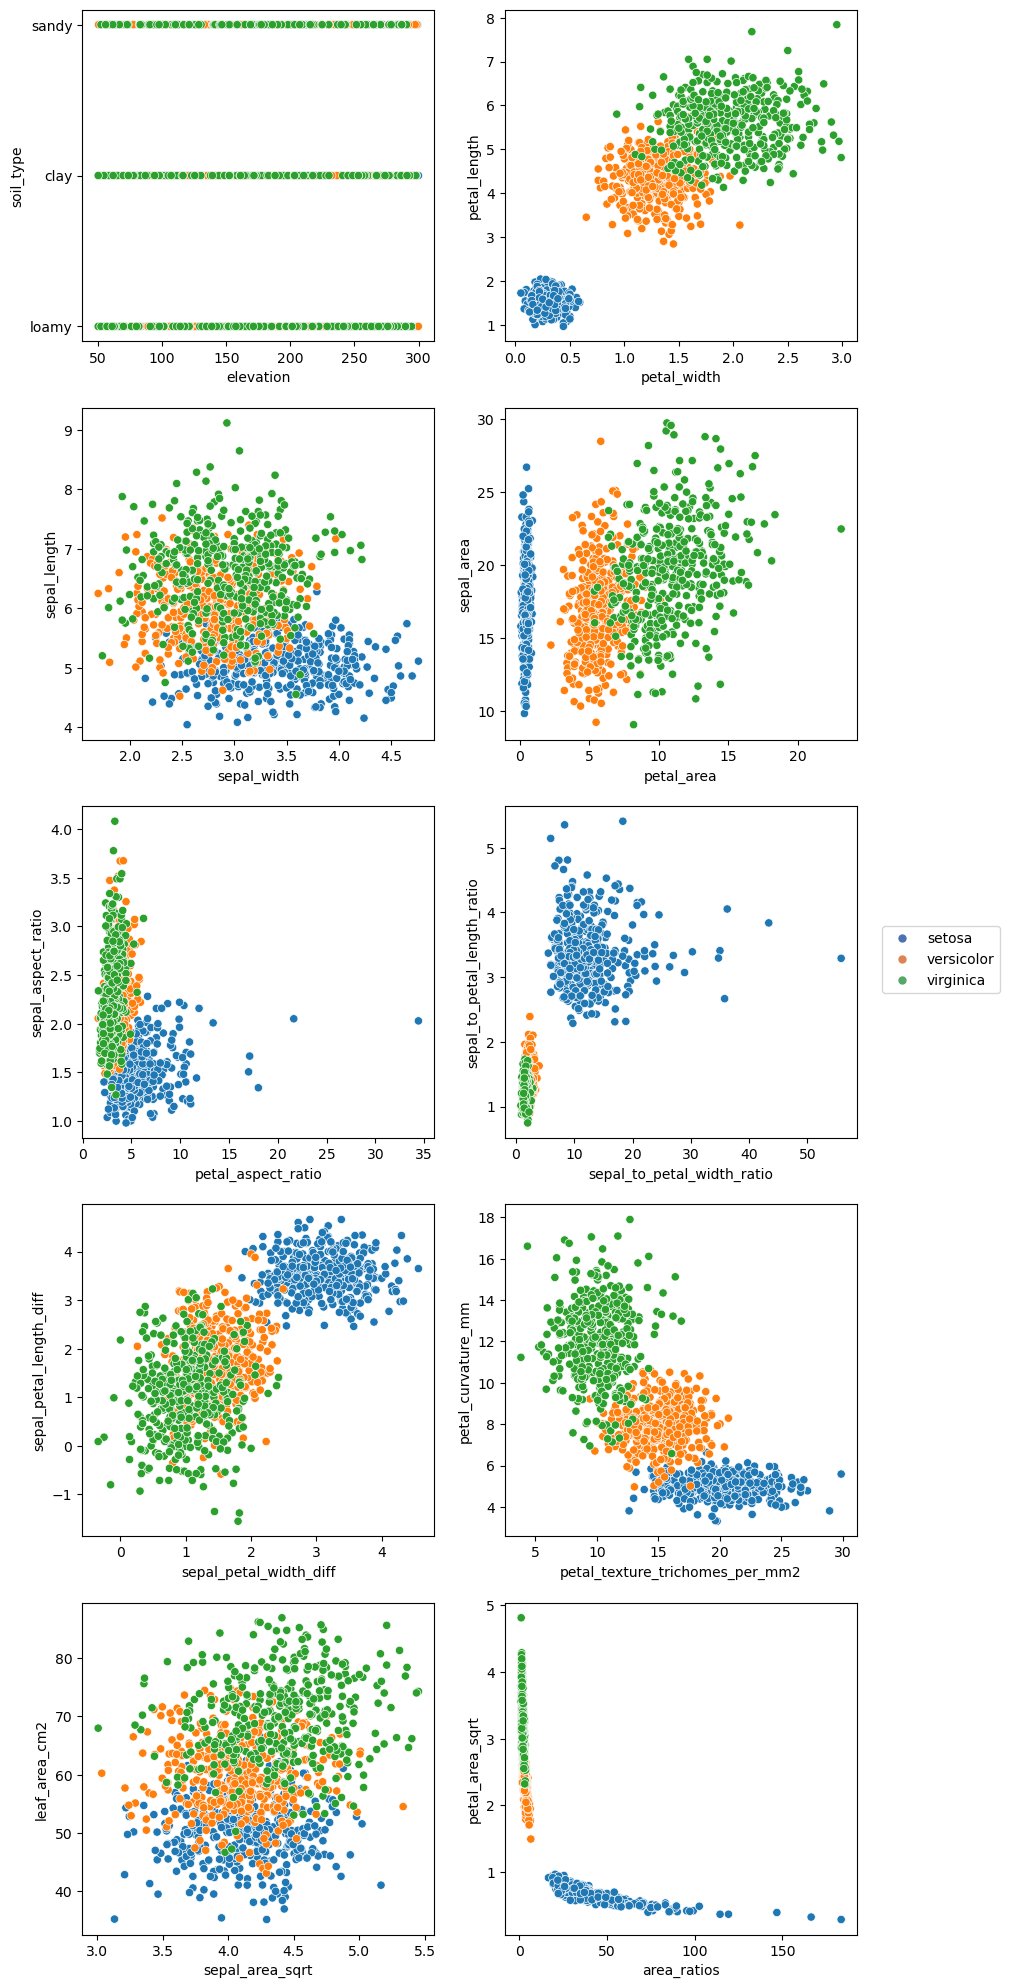

In [24]:
mostrar_graficos(df, 'species')

### Visualizar datos con PCA en 3D

In [150]:
def visualizacion_cluster_PCA3D(X_pca, predicted_labels, title):
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=predicted_labels, cmap='viridis', alpha=0.5)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_ylabel('Componente Principal 3')
    plt.title(title)
    plt.colorbar(sc, label='Cluster')
    plt.show()

## Normalización y Standarización

A continuación, se aplica la estandarización del conjunto de datos para normalizar las características a una misma escala. Esto es esencial para cuando se aplique PCA, intentar conseguir los mejor resultados posibles.

In [151]:
scaler=StandardScaler()
X1 = scaler.fit_transform(X)

In [152]:
X1 

array([[-0.16213924,  1.31418867, -0.87065368, ..., -0.03434344,
        -1.29909887,  1.16576526],
       [ 1.62714842,  0.05256755, -0.49205716, ...,  1.25718811,
        -1.21025432,  1.07160804],
       [-0.40374829,  1.31418867, -0.94164052, ..., -1.07444812,
        -1.21472385,  0.44822376],
       ...,
       [-1.37984889,  0.05256755,  1.05782233, ...,  1.22355769,
         1.03641723, -0.62547598],
       [ 0.9119856 ,  1.31418867,  0.57274554, ..., -1.07074209,
         0.80797912, -0.64795297],
       [ 0.38596817, -1.20905357, -0.87065368, ..., -0.36255402,
         0.65554292, -0.6264544 ]])

## Métricas de Evaluación

Antes de aplicar los algoritmos de clustering, se desarrollaron métodos que ayudan a evualuar la calidad de los clusters y obtener parámetros ópitmos para estos algoritmos. Los métodos utilizados son el Método del Codo (The Elbow Method) y el índice de la Silueta (Silhouette Score).

### The Elbow Method

El método del codo es una técnica utilizada en métodos de particionamiento, como el clustering de k-means, cuyo objetivo es definir clusters minimizando la variación dentro del cluster (WSS, por sus siglas en inglés). La variación total dentro del cluster mide la compactabilidad del clustering (también conocida como inertia), y se quiere que sea lo más pequeña posible. Se debe elegir un número de clusters de manera que añadir otro cluster no mejore significativamente el WSS total (Rodríguez, 2023) https://www.analyticslane.com/2023/06/09/metodo-del-codo-elbow-method-para-seleccionar-el-numero-optimo-de-clusteres-en-k-means\#google\_vignette y https://www.youtube.com/watch?v=8K-UxMEWBfc

En este caso, se desarollo el metodo con código propio, pero se utilzó de ejemplo la gráfica con: https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset#How-to-Implementing-K-Means-Clustering-?

In [153]:
def elbow_Method(X_data, model):
    wcss = []
    
    if model == "kmeans":
        for k in range(1,10):
            kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = "auto", random_state = 0)
            kmeans.fit(X_data)
            wcss.append(kmeans.inertia_)

        # Elbow curve clearly showing the best k value
        plt.plot(range(1,10),wcss)
        plt.xticks(range(1,10))
        plt.xlabel("Number of Clusters")
        plt.ylabel("WCSS value")
        plt.show()

    elif model == "agglomerative":
        range_n_clusters = range(2, 11)
        inertia = []

        for n_clusters in range_n_clusters:
            # Se ajusta Agglomerative Clustering con el enlace Ward
            linkage_matrix = linkage(X_data, method='ward')
            cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
            
            # Se calcular la suma de las distancias intra-clúster
            sum_distances = 0
            for i in range(1, n_clusters + 1):
                cluster_points = X_data[cluster_labels == i]
                centroid = cluster_points.mean(axis=0)
                sum_distances += np.sum((cluster_points - centroid) ** 2)

            inertia.append(sum_distances)
        
        # Se graficar el método del codo
        plt.figure(figsize=(8, 6))
        plt.plot(range_n_clusters, inertia, marker='o')
        plt.xlabel('Número de Clústeres')
        plt.ylabel('Suma de las Distancias Intra-Clúster')
        plt.title('Método del Codo para Agglomerative Clustering')
        plt.show()

### Silhouette Score

El método de la silueta promedio evalúa la calidad de un agrupamiento al medir cuán bien se encuentra cada objeto dentro de su clúster. Una mayor anchura promedio de la silueta indica un mejor agrupamiento. Por lo que, este método calcula la silueta promedio de las observaciones para diferentes valores de k. El número óptimo de clústeres k es aquel que maximiza la silueta promedio en un rango de valores posibles para k.  (Kaufman y Rousseeuw, 1990). https://doi.org/10.2307/2532178

In [154]:
from sklearn.metrics import silhouette_samples, silhouette_score

def silhouette(X_data, model, eps = 0, min_samples = 0):

    if model == "kmeans":
        
        for k in range(2,6):
        
            kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = "auto", random_state = 0).fit(X_data)
            cluster_labels = kmeans.predict(X_data)
            
            silhouette_avg = silhouette_score(X_data, cluster_labels, metric='euclidean')
            print("Para número de clústeres =", k, "el promedio de silhouette_score es:", silhouette_avg)
        
    elif model == "dbscan":

        score = 0
        best_min_samples = 0
        best_score = -1  # Índice de Silueta varía entre -1 y 1
        
        eps_range=(0.1, 2.0)
        min_samples_range=(2, 10)
        
        # Se va a iterar sobre diferentes valores de min_samples
        for min_samples in range(min_samples_range[0], min_samples_range[1] + 1):
            clusters = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X_data)
            
            # Se debe calcular el índice de silueta, ignorando el ruido etiquetado como -1 si es necesario
            if len(set(clusters)) > 1 and -1 in clusters:
                score = silhouette_score(X_data[clusters != -1], clusters[clusters != -1])
            else:
                score = silhouette_score(X_data, clusters)
                
            print(f"Para el valor de min_samples: {min_samples} el Índice de Silueta es: {score}")    
            
            # Se actualizar el mejor puntaje y el mejor valor de min_samples
            if score > best_score:
                best_score = score
                best_min_samples = min_samples

        print(f"Mejor valor de min_samples: {best_min_samples} con Índice de Silueta: {best_score}")

    elif model == "agglomerative":

        n_clusters = 3  # Se ajusta este valor según el método del codo o el dendrograma
        agglo_model = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = agglo_model.fit_predict(X_data)
        
        # Debe existir más de un cluster válido
        if len(set(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(X_data, cluster_labels)
            print(f"{n_clusters} clusters, con Índice de Silueta para Agglomerative Clustering: {silhouette_avg}")
        else:
            # Si solo hay un cluster, el índice de silueta no es válido
            print("No se puede calcular el índice de silueta porque solo hay un clúster válido.")

### Matriz de Confusión

La matriz de confusión evalúa el rendimiento de un modelo de clasificación mostrando las predicciones correctas e incorrectas distribuidas entre las clases. Por lo que, resume los verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN), permitiendo medir la precisión, la sensibilidad y la especificidad del método de clustering que se vaya a implementar. 

Código propio utilizando el ejemplo de la librería sklearn de la matriz de confusión: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [155]:
def plot_confusion_matrix(y_obs, y_pred):
    mc = sklearn.metrics.confusion_matrix(y_obs, y_pred)
    vis = sklearn.metrics.ConfusionMatrixDisplay(mc)
    vis.plot()

# Métodos Estudiados

## K-means

K-means es un algoritmo de agrupamiento no supervisado utilizado para dividir un conjunto de datos en \( k \) grupos o clusters. Cada punto de datos pertenece al cluster con la media más cercana, conocida como el centroide (Abdulhafedh, 2021). El objetivo es minimizar la variación dentro de cada cluster. El código se basó en el ejemplo de: https://youtu.be/ywgJLK5m0Sg?si=ilPGV8-Z18A1SplO

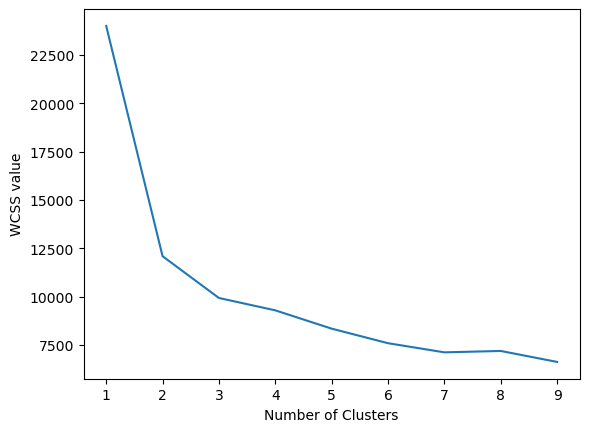

In [156]:
elbow_Method(X1, "kmeans") # Se gráfica el método del codo para conocer cual es la cantidad de clusters ideales para trabajar con K-means

Se puede observar que donde la línea comienza a aplanarse es en el cluster 3 (codo), por lo cual, despues de dicho número la varianza de los clusters no sería muy diferente. Por lo cual, el número óptimo sería 3 clusters.

In [157]:
silhouette(X1, "kmeans")

Para número de clústeres = 2 el promedio de silhouette_score es: 0.45327394262903736
Para número de clústeres = 3 el promedio de silhouette_score es: 0.3039540149947924
Para número de clústeres = 4 el promedio de silhouette_score es: 0.27603686836962
Para número de clústeres = 5 el promedio de silhouette_score es: 0.2513442902005388


Paea el índice de la silueta, el promedio que más se acerca a 1, sería utilizando 2 clusters (0.45); sin embargo, para realizar la predicción de los datos se van a utilizar 3 clusters, con un promedio de silueta 0.30.

In [158]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = "auto", random_state = 0)
predicted_labels = kmeans.fit_predict(X1)

In [159]:
true_labels = y.species.map({'versicolor': 0, 'virginica': 1, 'setosa': 2})

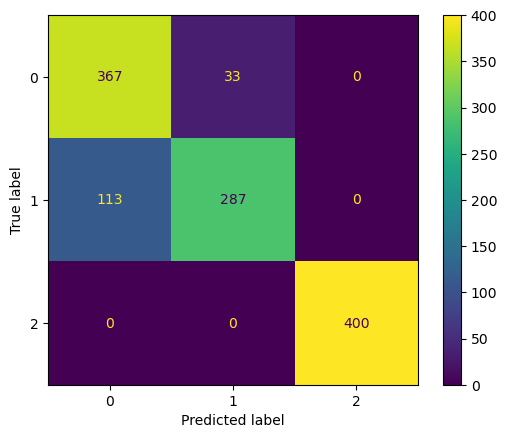

In [160]:
plot_confusion_matrix(true_labels, predicted_labels)

In [161]:
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Precisión de K-means: {accuracy}')

Precisión de K-means: 0.8783333333333333


## K-means con PCA (Principal Component Analysis)

El Análisis de Componentes Principales (PCA) es una técnica fundamental para reducir la complejidad de los datos al identificar patrones clave y conservar la información relevante. PCA simplifica el conjunto de datos al encontrar combinaciones lineales de variables que maximizan la varianza y no están correlacionadas entre sí (Abdulhafedh, 2021).

Se desarrolló este método con el ejemplo de: https://www.kaggle.com/code/matteoanzano111/visualizing-high-dimensional-data-pca-and-t-sne

In [162]:
pca_3d = PCA(n_components=5)
X_pca_3d = pca_3d.fit_transform(X1)
components = pca_3d.components_

def varianza_pca(pca_3d):
    # Se obtiene la varianza explicada por cada componente
    explained_variance_ratio = pca_3d.explained_variance_ratio_
    
    for i, variance in enumerate(explained_variance_ratio, start=1):
        print(f"Varianza explicada por el Componente Principal {i}: {variance:.2%}")
    
    # sE calcula la varianza total explicada por los componentes seleccionados
    total_explained_variance = np.sum(explained_variance_ratio)
    print(f"Varianza total explicada por los {len(explained_variance_ratio)} componentes: {total_explained_variance:.2%}")

In [163]:
varianza_pca(pca_3d)

Varianza explicada por el Componente Principal 1: 57.22%
Varianza explicada por el Componente Principal 2: 16.36%
Varianza explicada por el Componente Principal 3: 6.91%
Varianza explicada por el Componente Principal 4: 5.27%
Varianza explicada por el Componente Principal 5: 4.30%
Varianza total explicada por los 5 componentes: 90.06%


Se seleccionan entonces 5 componentes para PCA, porque al reducir la dimensionalidad y maximizar la varianza, se garantiza la retención de la mayor cantidad de información útil, minimizando el ruido y permitiendo explicar hasta cerca del 90% de la varianza total del conjunto de datos.

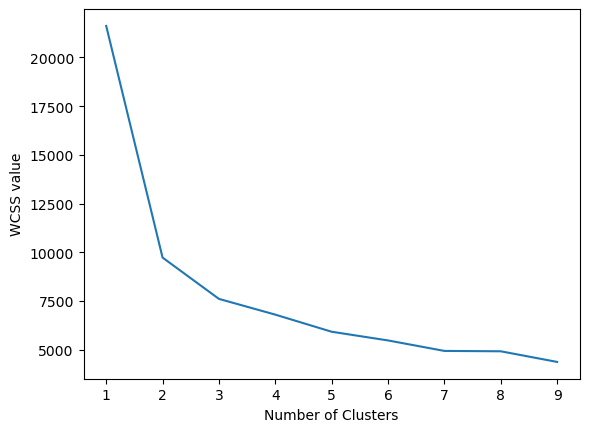

In [164]:
elbow_Method(X_pca_3d, "kmeans")

Del gráfico se puede observar que después de evaluar k número de clusters con PCA, el más óptimo de nuevo es 3.

In [165]:
silhouette(X_pca_3d, "kmeans")

Para número de clústeres = 2 el promedio de silhouette_score es: 0.5029863277039417
Para número de clústeres = 3 el promedio de silhouette_score es: 0.35381706410347125
Para número de clústeres = 4 el promedio de silhouette_score es: 0.27815380014079
Para número de clústeres = 5 el promedio de silhouette_score es: 0.2606307573050118


De igual forma, por razones de clasificación de los datos para la predicción, se tomarán 3 clusters para K-means con PCA, aunque el mejor índice de la silueta sea 0.50.

#### Kmeans con PCA

In [166]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = "auto", random_state = 0)
predicted_labels = kmeans.fit_predict(X_pca_3d)

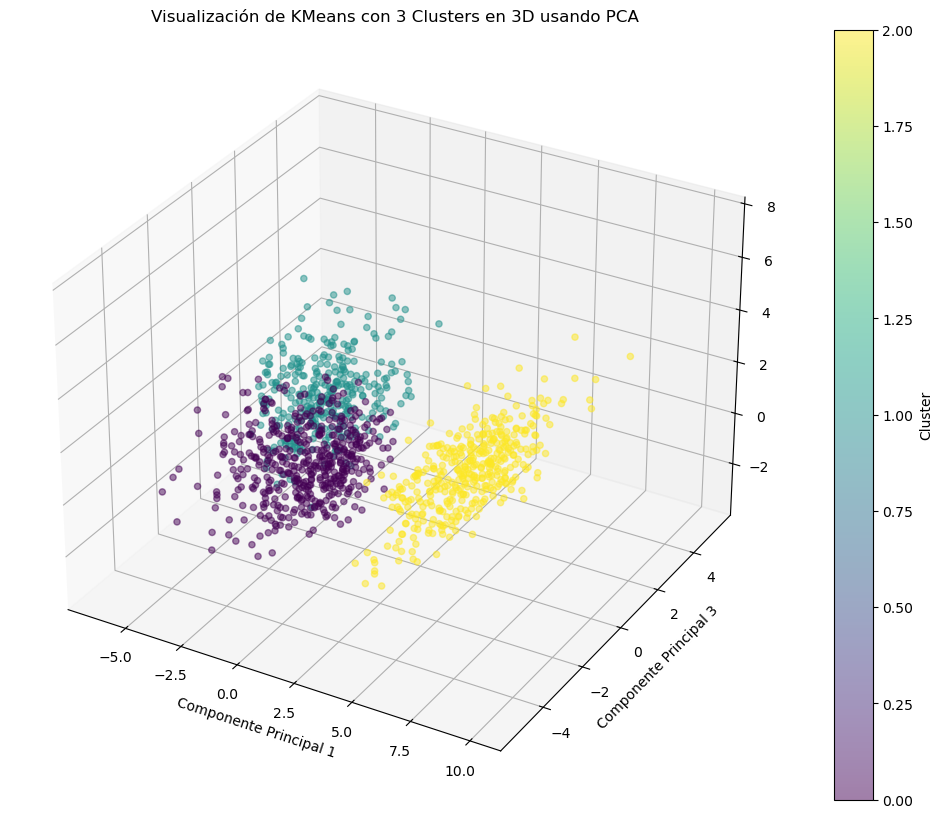

In [167]:
visualizacion_cluster_PCA3D(X_pca_3d, predicted_labels, title = 'Visualización de KMeans con 3 Clusters en 3D usando PCA')

In [168]:
contingency_table = pd.crosstab(predicted_labels, y.species)
print(contingency_table)

species  setosa  versicolor  virginica
row_0                                 
0             0         355        118
1             0          45        282
2           400           0          0


Esta tabla de contingencia, permite ver a cuál cluster fueron asignados cada uno de las especies de flores.

In [169]:
true_labels = y.species.map({'versicolor': 0, 'virginica': 1, 'setosa': 2})

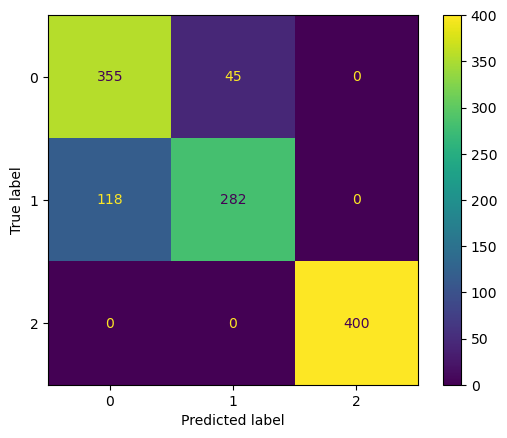

In [170]:
plot_confusion_matrix(true_labels, predicted_labels)

In [171]:
print(f"Exactitud de K-means con PCA: {accuracy_score(true_labels, predicted_labels):2f}")

Exactitud de K-means con PCA: 0.864167


## Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

DBSCAN, recorre todos los puntos del conjunto de datos de entrenamiento, marcándolos como visitados a medida que avanza. Si encuentra un punto central, inicia un nuevo cluster y asigna tanto al punto central como a sus vecinos a este cluster. Luego, explora los vecinos para encontrar otros puntos centrales y los agrega al mismo cluster, expandiendo el cluster mientras los puntos alcanzables por densidad continúan siendo visitados. Cuando todos los puntos densamente alcanzables han sido visitados, el algoritmo pasa a los puntos no visitados y repite el proceso para formar nuevos clusters. Finalmente, cualquier punto que no se asigne a un cluster se clasifica como punto de ruido (XLSTAT, 2024). https://www.xlstat.com/es/soluciones/funciones/dbscan-density-based-spatial-clustering-of-applications-with-noise

Para aplicar el método DBSCAN, se necesitan dos parámetros: epsilon (radio máximo de vecinos) y el número mínimo de puntos (MinPts). Se selecciona un punto alearorio como punto central.

#### ¿Cúal podría ser un buen valor de epsilon?

Se puede utilizar el método del vecino más cercano (NearestNeighbors) para determinar un buen valor de ε en DBSCAN, ya que permite calcular la distancia a los vecinos más cercanos de cada punto en el conjunto de datos. 

Para utilizar el método del vecino más cercano en la selección del valor de epsilon (ε) para DBSCAN, primero se calculan las distancias a los vecinos más cercanos de cada punto en el conjunto de datos, utilizando un número de vecinos igual al parámetro MinPts. Luego, se ordenan estas distancias y se grafican en una curva de distancias (k-dist). Se identifica el punto de inflexión en la curva, que marca una transición significativa en la densidad de los datos. El valor de ε se selecciona justo antes de este punto de inflexión, representando el umbral adecuado para la densidad mínima requerida para formar un clúster en DBSCAN. (ChatGPT)

In [172]:
min_samples = 2

def epsilon_DBSCAN(X_data, min_samples):
    # Se calculan las distancias al k-ésimo vecino más cercano
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(X_data)
    distances, indices = neighbors_fit.kneighbors(X_data)
    
    # Se ordenan las distancias
    distances = np.sort(distances[:, min_samples-1], axis=0)
    
    # Graficar las distancias
    plt.plot(distances)
    plt.xlabel('Puntos de datos ordenados')
    plt.ylabel('Distancia al k-ésimo vecino más cercano')
    plt.title('Gráfica de la distancia al k-ésimo vecino más cercano')
    plt.show()

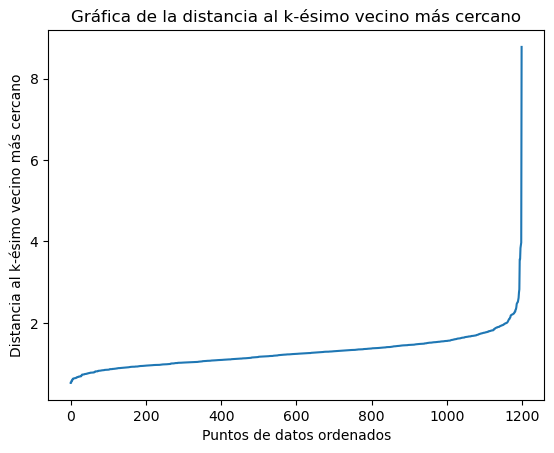

In [173]:
epsilon_DBSCAN(X1, min_samples = 2)

En este caso, un valor de epsilon 3 sería lo ideal según la gráfica.

El código de este algoritmo está basado en:

https://youtu.be/HMis89lGdkA?si=0I8KvQU7UyLeiIJS y https://www.kaggle.com/code/danesmaster/dbscan-iris-dataset

In [174]:
def DBSCAN_method(X_data, eps, min_samples):

    clusters = DBSCAN(eps, min_samples=min_samples).fit_predict(X_data)

    print("Etiquetas de clusters:", clusters)

    # El número de clusters encontrados (excluyendo el ruido si está etiquetado como -1)
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    print("Número de clusters encontrados:", n_clusters)

    # El número de puntos considerados como ruido
    n_noise = list(clusters).count(-1)
    print("Número de puntos de ruido:", n_noise)

    return clusters

clusters = DBSCAN_method(X1, eps = 3, min_samples = 2)

Etiquetas de clusters: [0 0 0 ... 1 1 1]
Número de clusters encontrados: 2
Número de puntos de ruido: 6


In [175]:
contingency_table = pd.crosstab(clusters, y.species)
print(contingency_table)

species  setosa  versicolor  virginica
row_0                                 
-1            6           0          0
 0          394           0          0
 1            0         400        400


In [176]:
true_labels = y.species.map({'setosa': 0, 'versicolor': 2, 'virginica': 1})

In [177]:
silhouette(X1, "dbscan", eps = 3, min_samples = 2)

Para el valor de min_samples: 2 el Índice de Silueta es: 0.4532285454024128
Para el valor de min_samples: 3 el Índice de Silueta es: 0.4532285454024128
Para el valor de min_samples: 4 el Índice de Silueta es: 0.4532285454024128
Para el valor de min_samples: 5 el Índice de Silueta es: 0.4532285454024128
Para el valor de min_samples: 6 el Índice de Silueta es: 0.4532285454024128
Para el valor de min_samples: 7 el Índice de Silueta es: 0.4532285454024128
Para el valor de min_samples: 8 el Índice de Silueta es: 0.4532285454024128
Para el valor de min_samples: 9 el Índice de Silueta es: 0.4532285454024128
Para el valor de min_samples: 10 el Índice de Silueta es: 0.4532285454024128
Mejor valor de min_samples: 2 con Índice de Silueta: 0.4532285454024128


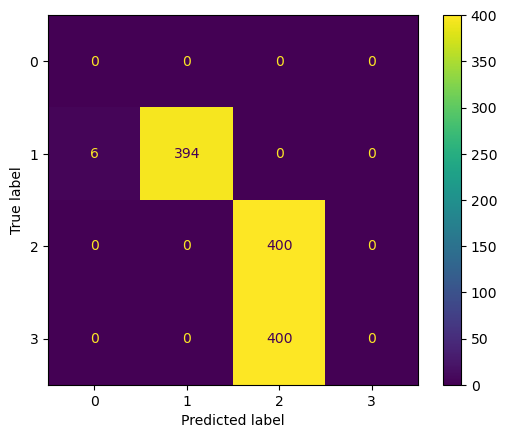

In [178]:
plot_confusion_matrix(true_labels, clusters)

In [179]:
print("Exactitud:", accuracy_score(clusters, true_labels))

Exactitud: 0.6616666666666666


## DBSCAN con PCA

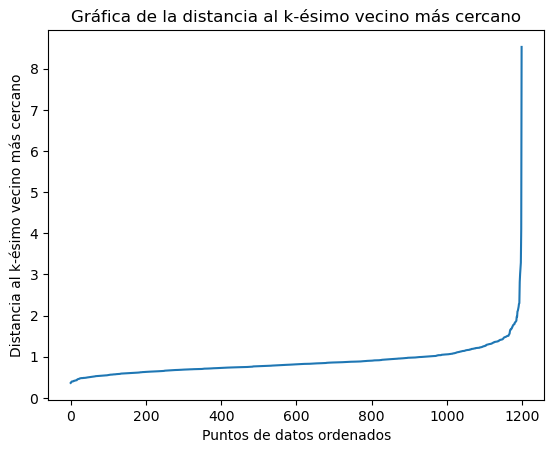

In [180]:
epsilon_DBSCAN(X_pca_3d, min_samples = 3)

In [181]:
silhouette(X_pca_3d, "dbscan", eps = 2, min_samples = 3)

Para el valor de min_samples: 2 el Índice de Silueta es: 0.5037900314188061
Para el valor de min_samples: 3 el Índice de Silueta es: 0.5037900314188061
Para el valor de min_samples: 4 el Índice de Silueta es: 0.5037900314188061
Para el valor de min_samples: 5 el Índice de Silueta es: 0.5037900314188061
Para el valor de min_samples: 6 el Índice de Silueta es: 0.5037900314188061
Para el valor de min_samples: 7 el Índice de Silueta es: 0.5037900314188061
Para el valor de min_samples: 8 el Índice de Silueta es: 0.5037900314188061
Para el valor de min_samples: 9 el Índice de Silueta es: 0.5037078939701939
Para el valor de min_samples: 10 el Índice de Silueta es: 0.5037078939701939
Mejor valor de min_samples: 2 con Índice de Silueta: 0.5037900314188061


In [182]:
clusters_pca = DBSCAN_method(X_pca_3d, 2, 3)

Etiquetas de clusters: [0 0 0 ... 1 1 1]
Número de clusters encontrados: 2
Número de puntos de ruido: 10


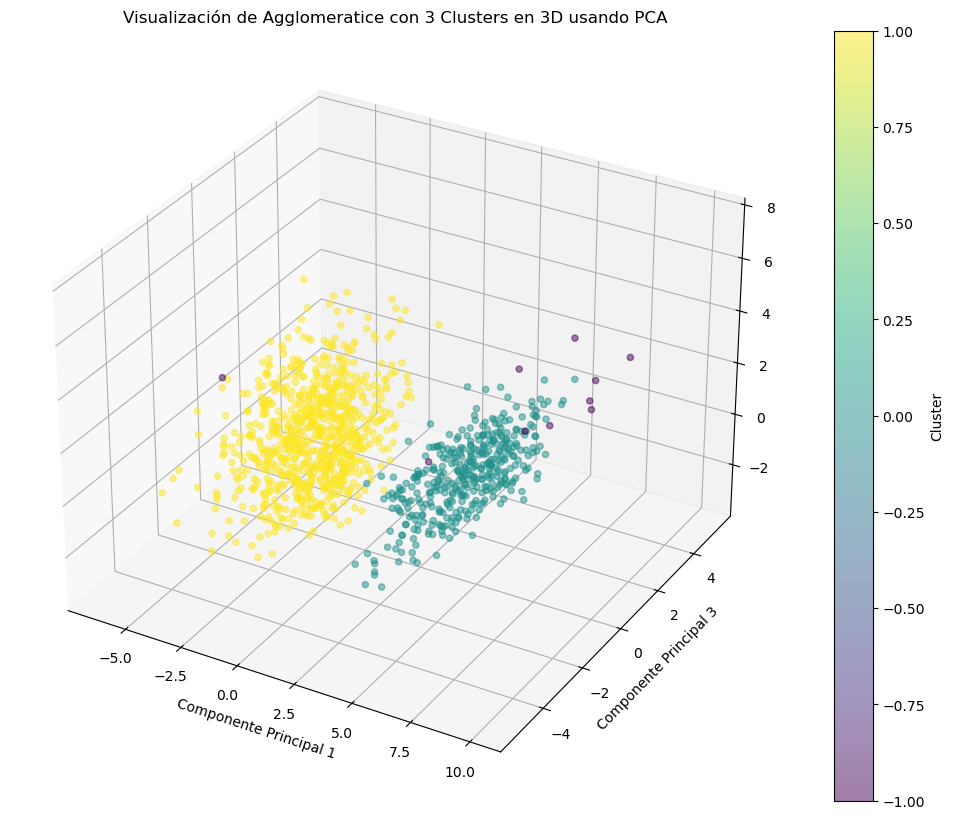

In [183]:
visualizacion_cluster_PCA3D(X_pca_3d, clusters_pca, title = 'Visualización de Agglomeratice con 3 Clusters en 3D usando PCA')

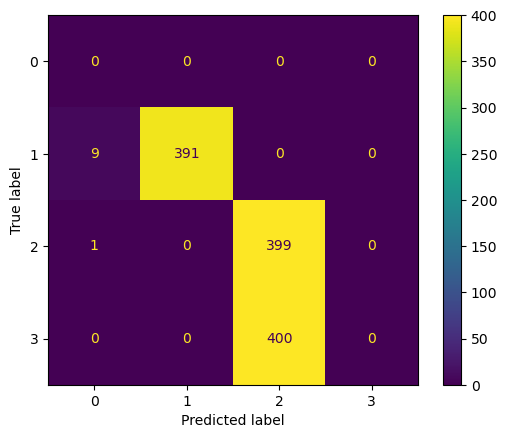

In [184]:
plot_confusion_matrix(true_labels, clusters_pca)

In [185]:
true_labels = y.species.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
print("Exactitud:", accuracy_score(clusters_pca, true_labels))

Exactitud: 0.6591666666666667


## Agglomerative Clustering

Agglomerative Clustering es una técnica de clusterización jerarquica, las agrupaciones decisivas y aglomerativas (Agglomerative Clustering), consiste en que cada punto empieza siendo un cluster y en cada interación se fusionan los clusters más próximos. Tal como lo explica Abdulhafedh (2021) (https://www.researchgate.net/publication/349094412_Incorporating_K-means_Hierarchical_Clustering_and_PCA_in_Customer_Segmentation):

Tal como se explica a continuación:
1) Calcular la matriz de proximidad.
2) Repetir hasta que solo quede un cluster:
    • Unir los dos clusters más próximos.
    • Actualizar la matriz de matriz de proximidad con el nuevo cluster.

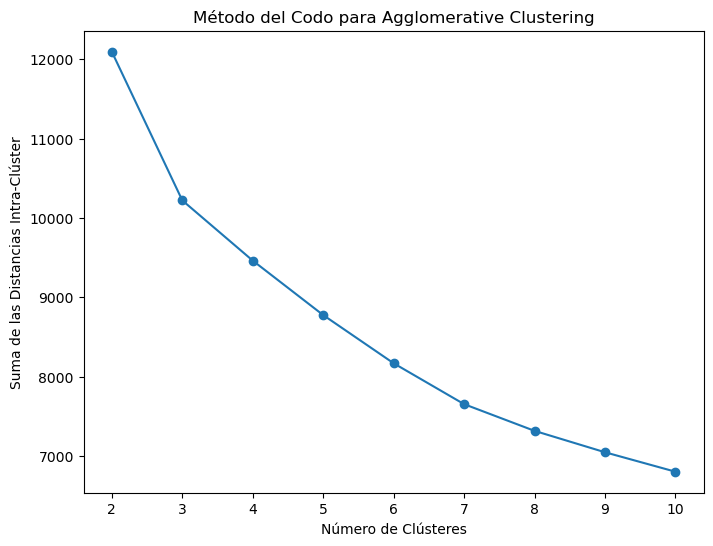

In [186]:
elbow_Method(X1, "agglomerative")

En este caso, la cantidad de cluster seleccionadas fue de 3.

In [187]:
silhouette(X1, "agglomerative")

3 clusters, con Índice de Silueta para Agglomerative Clustering: 0.27913057731216073


In [188]:
aggloclust = AgglomerativeClustering(n_clusters=3).fit_predict(X1)

In [189]:
contingency_table = pd.crosstab(aggloclust, y.species)
print(contingency_table)

species  setosa  versicolor  virginica
row_0                                 
0             0           4        377
1           400           0          0
2             0         396         23


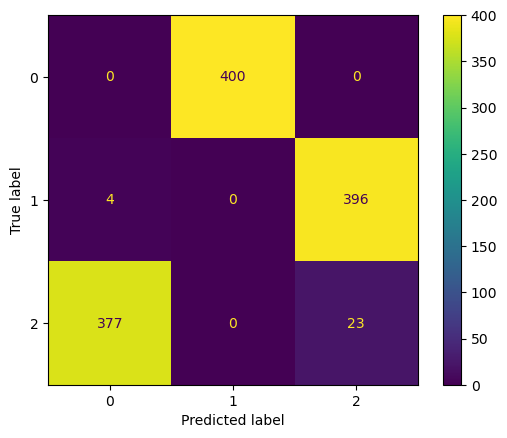

In [190]:
plot_confusion_matrix(true_labels, aggloclust)

In [191]:
true_labels = y.species.map({'setosa': 1, 'versicolor': 2, 'virginica': 0})
print("Exactitud:", sklearn.metrics.accuracy_score(aggloclust, true_labels))

Exactitud: 0.9775


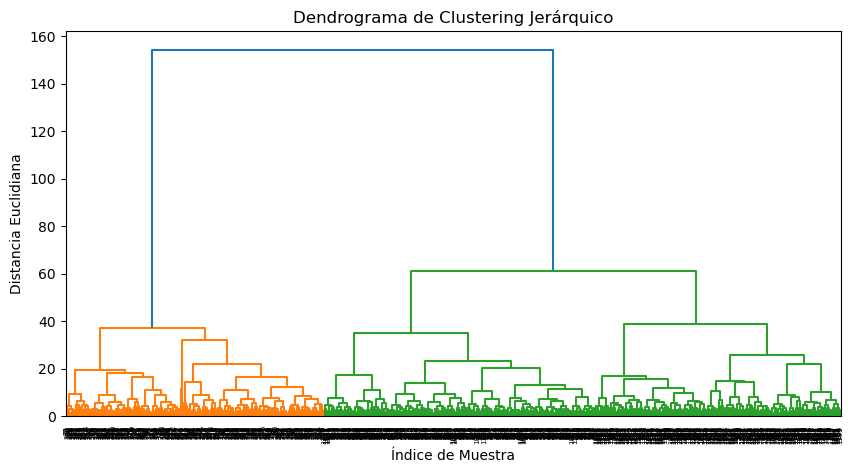

In [220]:
Z = linkage(X1, method='ward')  # El método 'ward' minimiza la varianza dentro de cada grupo

# Crear el dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índice de Muestra")
plt.ylabel("Distancia Euclidiana")
plt.show()

## Agglomerative Clustering con PCA

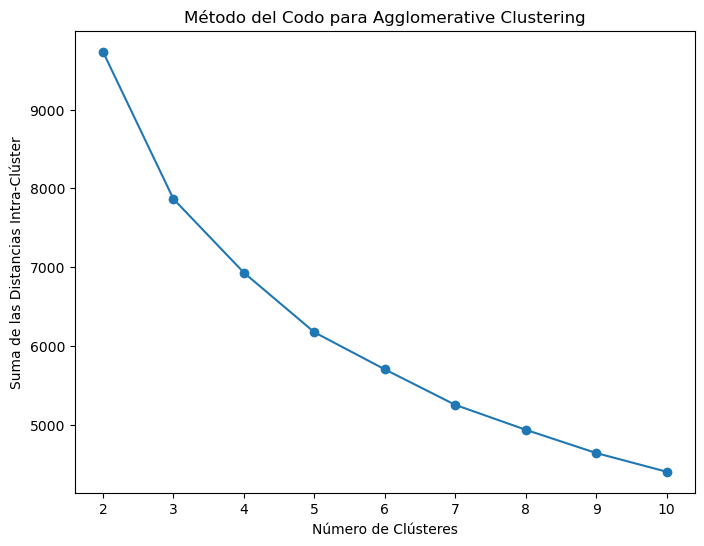

In [192]:
elbow_Method(X_pca_3d, "agglomerative")

Para Agglomerative con PCA, también se seleccionaron 3 clusters.

In [193]:
silhouette(X_pca_3d, "agglomerative")

3 clusters, con Índice de Silueta para Agglomerative Clustering: 0.34191778431106956


In [194]:
aggloclust_pca = AgglomerativeClustering(n_clusters=3).fit_predict(X_pca_3d)

In [195]:
contingency_table = pd.crosstab(aggloclust_pca, y.species)
print(contingency_table)
true_labels = y.species.map({'setosa': 1, 'versicolor': 0, 'virginica': 2})

species  setosa  versicolor  virginica
row_0                                 
0             0         399        138
1           400           0          0
2             0           1        262


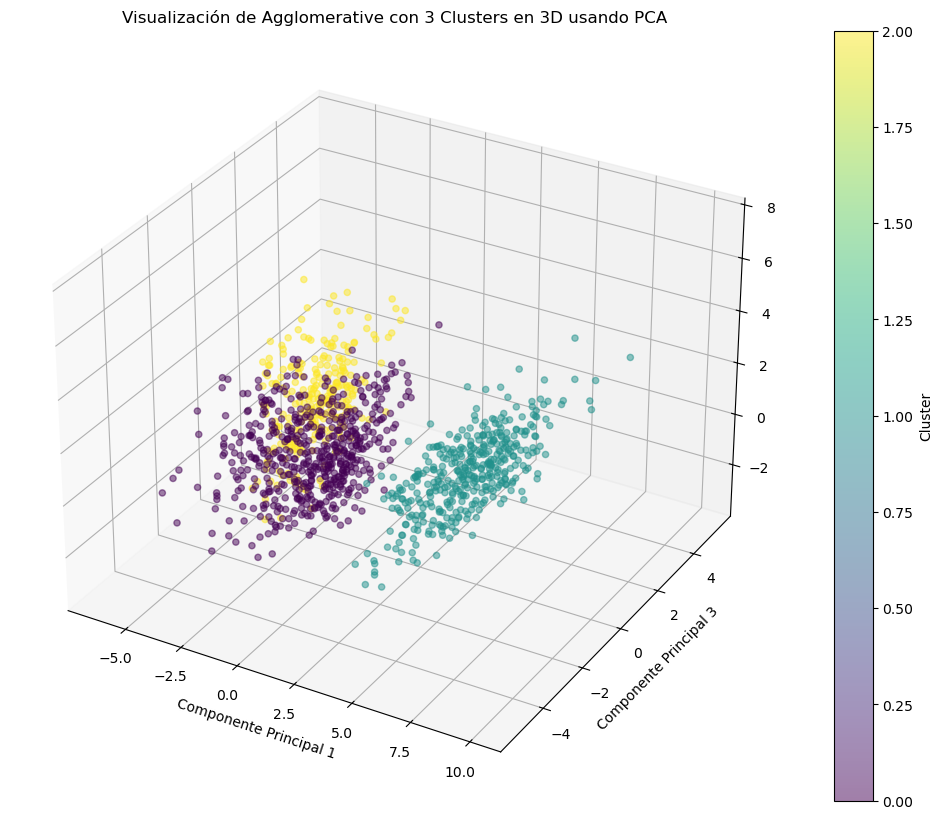

In [198]:
visualizacion_cluster_PCA3D(X_pca_3d, aggloclust_pca, title = 'Visualización de Agglomerative con 3 Clusters en 3D usando PCA')

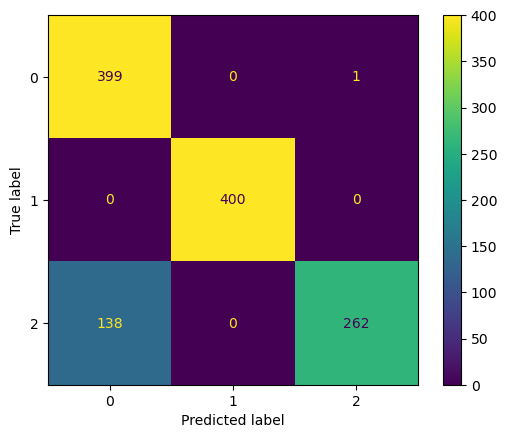

In [199]:
plot_confusion_matrix(true_labels, aggloclust_pca)

In [200]:
print("Exactitud:", accuracy_score(aggloclust_pca, true_labels))

Exactitud: 0.8841666666666667


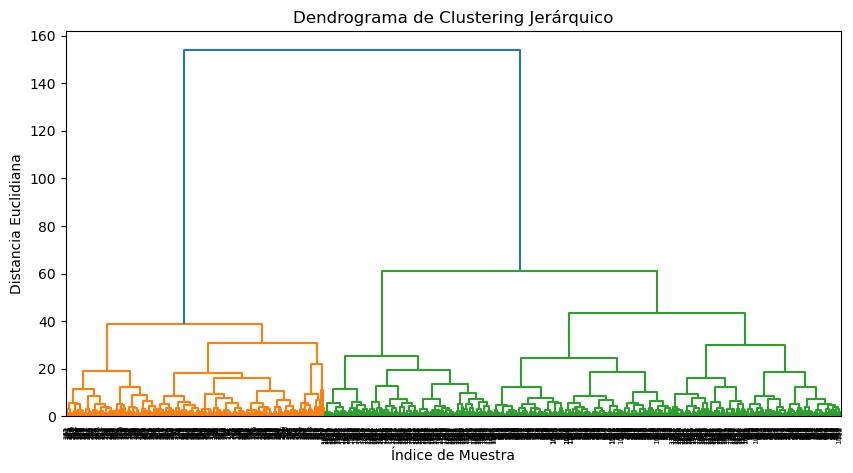

In [219]:
Z = linkage(X_pca_3d, method='ward')  # El método 'ward' minimiza la varianza dentro de cada grupo

# Crear el dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índice de Muestra")
plt.ylabel("Distancia Euclidiana")
plt.show()

# Pruebas y Resultados

En esta sección se evualua la precisión y la desviación estándar de todos los algoritmos con K-Fold de 5, con Train y Test. Asimismo, el código se realizó con base en tareas anteriores del curso de Sistemas Expertos, además de con la ayuda de ChatGTP para asignación de etiquetas.

### K-FOLDS & K-MEANS

In [202]:
def train_kmeans(X_data, y_true, num_folds, num_k):

    kf = KFold(n_splits = num_folds) # kf = KFold(n_splits=5, shuffle=True, random_state=42)
    train_accuracies = []
    test_accuracies = []
    std_accuracy_train = []
    std_accuracy_train = []
    
    for train_index, test_index in kf.split(X_data):
    
        X_train, X_test = X_data[train_index], X_data[test_index]
        y_train, y_test = y_true[train_index], y_true[test_index]

        kmeans = KMeans(n_clusters = num_k, init = 'k-means++', max_iter = 300, n_init = "auto", random_state = 0)
        
        # -------------------------- K-mean Train -------------------------
        y_pred_train = kmeans.fit_predict(X_train)
    
        contingency_table = pd.crosstab(y_pred_train, y_train)
    
        # Determinar el mapeo de clúster a clase dinámicamente
        cluster_to_class = {}
        for cluster in contingency_table.index:
            cluster_to_class[cluster] = contingency_table.loc[cluster].idxmax()
    
        # Modificar y_pred_train con el mapeo
        y_pred_train_mapped = np.vectorize(cluster_to_class.get)(y_pred_train)
    
        # Calcular la precisión para el conjunto de entrenamiento
        train_accuracy = accuracy_score(y_train, y_pred_train_mapped)
        train_accuracies.append(train_accuracy)
    
        # --------------------------- K-mean Test -------------------------
        y_pred_test = kmeans.fit_predict(X_test)
    
        contingency_table = pd.crosstab(y_pred_test, y_test)
    
        cluster_to_class = {}
        for cluster in contingency_table.index:
            cluster_to_class[cluster] = contingency_table.loc[cluster].idxmax()
    
        y_pred_test_mapped = np.vectorize(cluster_to_class.get)(y_pred_test)
        
        test_accuracy = accuracy_score(y_test, y_pred_test_mapped)
        test_accuracies.append(test_accuracy)
    
    average_accuracy_train = np.mean(train_accuracies)
    average_accuracy_test = np.mean(test_accuracies)

    # Calcular la desviación estándar
    std_accuracy_train = np.std(train_accuracies, ddof=1)
    std_accuracy_test = np.std(test_accuracies, ddof=1)
    
    return average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test

In [203]:
num_folds = 5
true_labels = y.species.map({'versicolor': 0, 'virginica': 1, 'setosa': 2})
y_true = np.array(true_labels)

In [204]:
average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test = train_kmeans(X1, y_true, num_folds = 5, num_k = 3)

print("K-fold con K-means")
print(f"Precisión Promedio en Entrenamiento: {average_accuracy_train:.2f}")
print(f"Precisión Promedio en Prueba: {average_accuracy_test:.2f}")

print(f"Desviación estándar de la precisión de entrenamiento: {std_accuracy_train:.4f}")
print(f"Desviación estándar de la precisión de prueba: {std_accuracy_test:.4f}")

K-fold con K-means
Precisión Promedio en Entrenamiento: 0.83
Precisión Promedio en Prueba: 0.98
Desviación estándar de la precisión de entrenamiento: 0.0463
Desviación estándar de la precisión de prueba: 0.0429


In [205]:
average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test  = train_kmeans(X_pca_3d, y_true, num_folds = 5, num_k = 3)

print("K-fold con K-means y PCA")
print(f"Precisión Promedio en Entrenamiento: {average_accuracy_train:.2f}")
print(f"Precisión Promedio en Prueba: {average_accuracy_test:.2f}")

print(f"Desviación estándar de la precisión de entrenamiento: {std_accuracy_train:.4f}")
print(f"Desviación estándar de la precisión de prueba: {std_accuracy_test:.4f}")

K-fold con K-means y PCA
Precisión Promedio en Entrenamiento: 0.86
Precisión Promedio en Prueba: 0.98
Desviación estándar de la precisión de entrenamiento: 0.0249
Desviación estándar de la precisión de prueba: 0.0410


### K-FOLDS & DBSCAN

In [221]:
def assign_labels_dynamically(cluster_labels, y_true):
    unique_labels_y = np.unique(y_true)
    unique_clusters = np.unique(cluster_labels)
    
    # Se calcular matriz de contingencia
    contingency_table = pd.crosstab(cluster_labels, y_true)
    
    # Se inicializa el diccionario para mapeo de cluster a etiqueta
    cluster_to_label = {}
    
    # Se asignar etiquetas a cada cluster, ignorando el ruido (cluster == -1)
    for cluster in unique_clusters:
        if cluster == -1:
            continue
        
        # Se obtenienen las etiquetas en el cluster actual
        labels_in_cluster = contingency_table.loc[cluster].idxmax()
        
        # Se asigna la etiqueta con más ocurrencias en el cluster actual
        cluster_to_label[cluster] = labels_in_cluster
    
    # Asegurar que cada cluster tenga una asignación única de etiqueta
    assigned_labels = np.array([cluster_to_label.get(cluster, -1) for cluster in cluster_labels])
    
    return assigned_labels

In [222]:
def train_DBSCAN(X_data, y_true, num_folds, num_eps, param_msamples):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    train_accuracies = []
    test_accuracies = []
    std_accuracy_train = [] 
    std_accuracy_train = []
    
    for train_index, test_index in kf.split(X_data):
        X_train, X_test = X_data[train_index], X_data[test_index]
        y_train, y_test = y_true[train_index], y_true[test_index]

        dbscan_model = DBSCAN(eps=num_eps, min_samples=param_msamples)
        
        # -------------------------- DBSCAN Train -------------------------
        y_pred_train = dbscan_model.fit_predict(X_train)

        assigned_labels = assign_labels_dynamically(y_pred_train, y_train)

        train_accuracy = accuracy_score(y_train, assigned_labels)
        train_accuracies.append(train_accuracy)

        # -------------------------- DBSCAN Train -------------------------
        y_pred_test = dbscan_model.fit_predict(X_test)

        assigned_labels = assign_labels_dynamically(y_pred_test, y_test)

        test_accuracy = accuracy_score(y_test, assigned_labels)
        test_accuracies.append(test_accuracy)

    average_accuracy_train = np.mean(train_accuracies)
    average_accuracy_test = np.mean(test_accuracies)

    std_accuracy_train = np.std(train_accuracies, ddof=1)
    std_accuracy_test = np.std(test_accuracies, ddof=1)

    return average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test

In [223]:
true_labels = y.species.map({'versicolor': 0, 'virginica': 1, 'setosa': 2})
y_true = np.array(true_labels)

In [224]:
average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test = train_DBSCAN(X1, y_true, num_folds = 5, num_eps = 3, param_msamples = 2)
print("K-fold con DBSCAN")

print(f"Precisión Promedio en Entrenamiento: {average_accuracy_train:.4f}")
print(f"Precisión Promedio en Prueba: {average_accuracy_test:.4f}")

print(f"Desviación estándar de la precisión de entrenamiento: {std_accuracy_train:.4f}")
print(f"Desviación estándar de la precisión de prueba: {std_accuracy_test:.4f}")

K-fold con DBSCAN
Precisión Promedio en Entrenamiento: 0.6669
Precisión Promedio en Prueba: 0.6800
Desviación estándar de la precisión de entrenamiento: 0.0045
Desviación estándar de la precisión de prueba: 0.0190


In [226]:
average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test = train_DBSCAN(X_pca_3d, y_true, num_folds = 5, num_eps = 2, param_msamples = 3) #3

print("K-fold con DBSCAN y PCA")
print(f"Precisión Promedio en Entrenamiento: {average_accuracy_train:.4f}")
print(f"Precisión Promedio en Prueba: {average_accuracy_test:.4f}")

print(f"Desviación estándar de la precisión de entrenamiento: {std_accuracy_train:.4f}")
print(f"Desviación estándar de la precisión de prueba: {std_accuracy_test:.4f}")

K-fold con DBSCAN y PCA
Precisión Promedio en Entrenamiento: 0.6640
Precisión Promedio en Prueba: 0.6625
Desviación estándar de la precisión de entrenamiento: 0.0052
Desviación estándar de la precisión de prueba: 0.0212


### K-FOLDS & AGGLOMERATIVE

In [227]:
def train_Agglomerative(X_data, y_true, num_folds, num_k):

    kf = KFold(n_splits = num_folds) # kf = KFold(n_splits=5, shuffle=True, random_state=42)
    train_accuracies = []
    test_accuracies = []
    std_accuracy_train = [] 
    std_accuracy_train = []

    for train_index, test_index in kf.split(X_data):
    
        X_train, X_test = X_data[train_index], X_data[test_index]
        y_train, y_test = y_true[train_index], y_true[test_index]

        
        # -------------------------- Agglomerative Train -------------------------
        y_pred_train = AgglomerativeClustering(n_clusters=num_k).fit_predict(X_train)
        contingency_table = pd.crosstab(y_pred_train, y_train)
    
        # Se determinar el mapeo de clúster a clase dinámicamente
        cluster_to_class = {}
        for cluster in contingency_table.index:
            cluster_to_class[cluster] = contingency_table.loc[cluster].idxmax()
    
        # Se modificar y_pred_train con el mapeo
        y_pred_train_mapped = np.vectorize(cluster_to_class.get)(y_pred_train)
    
        # Se calcular la precisión para el conjunto de entrenamiento
        train_accuracy = accuracy_score(y_train, y_pred_train_mapped)
        train_accuracies.append(train_accuracy)
    
        # --------------------------- Agglomerative Test -------------------------
        y_pred_test = AgglomerativeClustering(n_clusters=num_k).fit_predict(X_test)
        contingency_table = pd.crosstab(y_pred_test, y_test)
    
        cluster_to_class = {}
        for cluster in contingency_table.index:
            cluster_to_class[cluster] = contingency_table.loc[cluster].idxmax()
    
        y_pred_test_mapped = np.vectorize(cluster_to_class.get)(y_pred_test)
        
        test_accuracy = accuracy_score(y_test, y_pred_test_mapped)
        test_accuracies.append(test_accuracy)
    
    average_accuracy_train = np.mean(train_accuracies)
    average_accuracy_test = np.mean(test_accuracies)

    # Calcular la desviación estándar
    std_accuracy_train = np.std(train_accuracies, ddof=1)
    std_accuracy_test = np.std(test_accuracies, ddof=1)
    
    return average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test

In [228]:
true_labels = y.species.map({'versicolor': 0, 'virginica': 1, 'setosa': 2})
y_true = np.array(true_labels)

In [231]:
average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test = train_Agglomerative(X1, y_true, num_folds = 5, num_k = 3)

print("K-fold con Agglomerative")

print(f"Precisión Promedio en Entrenamiento: {average_accuracy_train:.4f}")
print(f"Precisión Promedio en Prueba: {average_accuracy_test:.4f}")

print(f"Desviación estándar de la precisión de entrenamiento: {std_accuracy_train:.4f}")
print(f"Desviación estándar de la precisión de prueba: {std_accuracy_test:.4f}")

K-fold con Agglomerative
Precisión Promedio en Entrenamiento: 0.9340
Precisión Promedio en Prueba: 0.9958
Desviación estándar de la precisión de entrenamiento: 0.0646
Desviación estándar de la precisión de prueba: 0.0093


In [232]:
average_accuracy_train, average_accuracy_test, std_accuracy_train, std_accuracy_test = train_Agglomerative(X_pca_3d, y_true, num_folds = 5, num_k = 3)

print("K-fold con Agglomerative y PCA")
print(f"Precisión Promedio en Entrenamiento: {average_accuracy_train:.2f}")
print(f"Precisión Promedio en Prueba: {average_accuracy_test:.2f}")

print(f"Desviación estándar de la precisión de entrenamiento: {std_accuracy_train:.4f}")
print(f"Desviación estándar de la precisión de prueba: {std_accuracy_test:.4f}")

K-fold con Agglomerative y PCA
Precisión Promedio en Entrenamiento: 0.88
Precisión Promedio en Prueba: 0.97
Desviación estándar de la precisión de entrenamiento: 0.0377
Desviación estándar de la precisión de prueba: 0.0671
